# Data Prepration for Gradient Boosting
XGBoost is a popular implementation of Gradient Boosting because of its speed and performance.
Internally, XGBoost models represent all problems as a regression predictive modeling problem
that only takes numerical values as input. If your data is in a dierent form, it must be prepared
into the expected format. In this tutorial you will discover how to prepare your data for using
with gradient boosting with the XGBoost library in Python.

In [30]:
# Load up packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import h2o
from h2o.automl import H2OAutoML

In [31]:
# Load data
data = pd.read_csv('bankruptcy_Train.csv')

In [32]:
# Seeing how big the dataset is
data.shape

(10000, 65)

In [33]:
# Glancing at what some of the values are
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [34]:
# Checking for null values
data.isnull().values.any()

False

In [35]:
data.rename(columns={'class':'target'}, inplace=True)

In [36]:
# For features in h2o model
cont_names = data.columns[:-1]

In [37]:
#Setting up desired output and features for logistic regression and xgboost models
output = data[data.columns[-1]]
features = data[data.columns[:(data.shape[1]-1)]]

In [38]:
#Check the balance of outputs
output.value_counts()

0    9797
1     203
Name: target, dtype: int64

In [39]:
#splits data into X (features) and y (predictions)
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], 1)
test = pd.concat([X_test, y_test], 1)

C:\Users\Lester\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


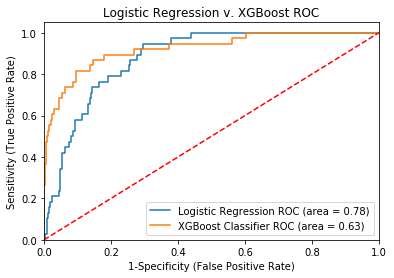

In [41]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(class_weight='balanced'),
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(max_depth=10, n_estimators=300),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Logistic Regression v. XGBoost ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
# starting up h20
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\Lester\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lester\AppData\Local\Temp\tmpekqanxd6
  JVM stdout: C:\Users\Lester\AppData\Local\Temp\tmpekqanxd6\h2o_Lester_started_from_python.out
  JVM stderr: C:\Users\Lester\AppData\Local\Temp\tmpekqanxd6\h2o_Lester_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_Lester_ia9k7s
H2O cluster total nodes:,1
H2O cluster free memory:,2.488 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [14]:
# Training phase set up
data = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
# Setting up features and output for h2o models
data['target'] = data['target'].asfactor()
y = "target"
cont_names = cont_names.tolist()
x = cont_names

In [16]:
# Setting up max time of model training
aml = H2OAutoML(max_runtime_secs= 3600, max_models=60, sort_metric='AUC')
aml.train(x = x, y = y, training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [17]:
# Displaying best models built
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190911_090503_model_23,0.899137,0.0725193,0.310849,0.132298,0.0175027
GBM_grid_1_AutoML_20190911_090503_model_18,0.897865,0.0772037,0.356301,0.134703,0.0181448
GBM_grid_1_AutoML_20190911_090503_model_13,0.893198,0.0747932,0.332219,0.133125,0.0177224
GBM_3_AutoML_20190911_090503,0.890508,0.07836,0.364404,0.133299,0.0177685
StackedEnsemble_BestOfFamily_AutoML_20190911_090503,0.889572,0.0780451,0.303576,0.133848,0.0179153
GBM_2_AutoML_20190911_090503,0.888856,0.0765385,0.345903,0.132528,0.0175636
GBM_4_AutoML_20190911_090503,0.887013,0.0799721,0.351007,0.133711,0.0178787
StackedEnsemble_AllModels_AutoML_20190911_090503,0.885839,0.0751823,0.327658,0.130637,0.017066
GBM_5_AutoML_20190911_090503,0.883991,0.0754682,0.320514,0.133106,0.0177171
GBM_grid_1_AutoML_20190911_090503_model_19,0.88295,0.0820056,0.3283,0.137745,0.0189736


In [20]:
# Creating Predictions of best model
hf = h2o.H2OFrame(test)
preds = aml.predict(hf)
preds = preds.as_data_frame()
preds['p_p0'] = np.exp(preds['p0'])
preds['p_p1'] = np.exp(preds['p1'])
preds['sm'] = preds['p_p1'] / (preds['p_p0'] + preds['p_p1'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [21]:
# ROC score of best model
roc_auc_score(y_test, preds['sm'])

0.8873866623745909

In [22]:
# Settings of best model
aml.leader.summary()


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,75.0,75.0,47764.0,8.0,14.0,13.92,24.0,62.0,45.97333


In [23]:
# Saving model for future use
h2o.save_model(aml.leader, path = "/model_bankrupt", force=True)

'C:\\model_bankrupt\\GBM_grid_1_AutoML_20190911_090503_model_23'

In [25]:
# Loading model to avoid training time again
saved_model = h2o.load_model('C:\\model_bankrupt\\GBM_grid_1_AutoML_20190911_090503_model_23')
saved_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_20190911_090503_model_23


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,75.0,75.0,47764.0,8.0,14.0,13.92,24.0,62.0,45.97333




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.008294580542420911
RMSE: 0.0910745877971507
LogLoss: 0.03230963368157359
Mean Per-Class Error: 0.0061263560944480044
AUC: 0.9991928216433641
pr_auc: 0.9559313227273424
Gini: 0.9983856432867282

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18433657132730907: 

,,0,1,Error,Rate
0,0,7806.0,29.0,0.0037,(29.0/7835.0)
1,1,6.0,159.0,0.0364,(6.0/165.0)
2,Total,7812.0,188.0,0.0044,(35.0/8000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.184337,0.900850,136.0
1,max f2,0.176197,0.943728,139.0
2,max f0point5,0.234578,0.916775,114.0
3,max accuracy,0.234578,0.995750,114.0
4,max precision,0.779953,1.000000,0.0
5,max recall,0.111977,1.000000,173.0
6,max specificity,0.779953,1.000000,0.0
7,max absolute_mcc,0.184337,0.900623,136.0
8,max min_per_class_accuracy,0.134969,0.990938,161.0
9,max mean_per_class_accuracy,0.111977,0.993874,173.0



Gains/Lift Table: Avg response rate:  2.06 %, avg score:  2.08 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.410562,48.484848,48.484848,1.0000,0.563159,1.000000,0.563159,0.484848,0.484848,4748.484848,4748.484848
1,,2,0.02,0.218043,40.000000,44.242424,0.8250,0.309274,0.912500,0.436216,0.400000,0.884848,3900.000000,4324.242424
2,,3,0.03,0.129953,10.909091,33.131313,0.2250,0.169553,0.683333,0.347329,0.109091,0.993939,990.909091,3213.131313
3,,4,0.04,0.086596,0.606061,25.000000,0.0125,0.103414,0.515625,0.286350,0.006061,1.000000,-39.393939,2400.000000
4,,5,0.05,0.072747,0.000000,20.000000,0.0000,0.079353,0.412500,0.244951,0.000000,1.000000,-100.000000,1900.000000
5,,6,0.10,0.038202,0.000000,10.000000,0.0000,0.051786,0.206250,0.148368,0.000000,1.000000,-100.000000,900.000000
6,,7,0.15,0.024680,0.000000,6.666667,0.0000,0.030497,0.137500,0.109078,0.000000,1.000000,-100.000000,566.666667
7,,8,0.20,0.017070,0.000000,5.000000,0.0000,0.020620,0.103125,0.086963,0.000000,1.000000,-100.000000,400.000000
8,,9,0.30,0.009097,0.000000,3.333333,0.0000,0.012552,0.068750,0.062160,0.000000,1.000000,-100.000000,233.333333
9,,10,0.40,0.005782,0.000000,2.500000,0.0000,0.007233,0.051562,0.048428,0.000000,1.000000,-100.000000,150.000000




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.017502659944112167
RMSE: 0.132297618814974
LogLoss: 0.07251934003016451
Mean Per-Class Error: 0.17694301019125525
AUC: 0.899137127497051
pr_auc: 0.25699470269712416
Gini: 0.798274254994102

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1234223270831083: 

,,0,1,Error,Rate
0,0,7665.0,170.0,0.0217,(170.0/7835.0)
1,1,99.0,66.0,0.6,(99.0/165.0)
2,Total,7764.0,236.0,0.0336,(269.0/8000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.123422,0.329177,122.0
1,max f2,0.081283,0.383877,164.0
2,max f0point5,0.226554,0.365112,61.0
3,max accuracy,0.407422,0.980500,14.0
4,max precision,0.614278,1.000000,0.0
5,max recall,0.002363,1.000000,380.0
6,max specificity,0.614278,1.000000,0.0
7,max absolute_mcc,0.123422,0.317762,122.0
8,max min_per_class_accuracy,0.017966,0.811359,296.0
9,max mean_per_class_accuracy,0.013511,0.823057,314.0



Gains/Lift Table: Avg response rate:  2.06 %, avg score:  1.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.227189,20.606061,20.606061,0.4250,0.321355,0.425000,0.321355,0.206061,0.206061,1960.606061,1960.606061
1,,2,0.02,0.151067,9.696970,15.151515,0.2000,0.179055,0.312500,0.250205,0.096970,0.303030,869.696970,1415.151515
2,,3,0.03,0.121095,9.696970,13.333333,0.2000,0.135438,0.275000,0.211949,0.096970,0.400000,869.696970,1233.333333
3,,4,0.04,0.093698,4.848485,11.212121,0.1000,0.106015,0.231250,0.185466,0.048485,0.448485,384.848485,1021.212121
4,,5,0.05,0.078557,4.242424,9.818182,0.0875,0.085660,0.202500,0.165505,0.042424,0.490909,324.242424,881.818182
5,,6,0.10,0.042097,2.545455,6.181818,0.0525,0.057357,0.127500,0.111431,0.127273,0.618182,154.545455,518.181818
6,,7,0.15,0.026508,1.575758,4.646465,0.0325,0.033601,0.095833,0.085488,0.078788,0.696970,57.575758,364.646465
7,,8,0.20,0.017996,2.181818,4.030303,0.0450,0.021907,0.083125,0.069592,0.109091,0.806061,118.181818,303.030303
8,,9,0.30,0.009917,1.090909,3.050505,0.0225,0.013298,0.062917,0.050827,0.109091,0.915152,9.090909,205.050505
9,,10,0.40,0.006005,0.484848,2.409091,0.0100,0.007725,0.049688,0.040052,0.048485,0.963636,-51.515152,140.909091




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.968375,0.007687754,0.960625,0.973125,0.979375,0.965,0.96375
1,auc,0.90159273,0.018951938,0.9015701,0.90902066,0.8715941,0.9022505,0.92352843
2,err,0.031625,0.007687754,0.039375,0.026875,0.020625,0.035,0.03625
3,err_count,50.6,12.300406,63.0,43.0,33.0,56.0,58.0
4,f0point5,0.3389019,0.07267198,0.28089887,0.38690478,0.44247788,0.3053435,0.27888447
5,f1,0.3531937,0.027158745,0.32258064,0.3768116,0.3773585,0.36363637,0.3255814
6,f2,0.3830933,0.04378084,0.37878788,0.36723164,0.32894737,0.4494382,0.39106146
7,lift_top_group,18.729553,1.329624,20.0,19.444445,18.181818,16.666666,19.35484
8,logloss,0.07251934,0.005552909,0.07623816,0.07651082,0.07695944,0.06659759,0.06629069
9,max_per_class_error,0.5844682,0.08798761,0.5714286,0.6388889,0.6969697,0.46666667,0.5483871



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-09-11 09:12:05,4 min 58.709 sec,0.0,0.142125,0.100462,0.500000,0.000000,1.000000,0.979375
1,,2019-09-11 09:12:05,4 min 59.020 sec,5.0,0.138810,0.085418,0.942869,0.254578,16.541889,0.052250
2,,2019-09-11 09:12:05,4 min 59.363 sec,10.0,0.135834,0.077219,0.956247,0.343420,23.636364,0.029250
3,,2019-09-11 09:12:06,4 min 59.709 sec,15.0,0.133102,0.071273,0.964590,0.405930,24.848485,0.026375
4,,2019-09-11 09:12:06,5 min 0.037 sec,20.0,0.129445,0.065383,0.975395,0.519861,32.727273,0.021250
5,,2019-09-11 09:12:06,5 min 0.381 sec,25.0,0.126039,0.060643,0.981740,0.582148,35.757576,0.017625
6,,2019-09-11 09:12:07,5 min 0.709 sec,30.0,0.122062,0.055967,0.987591,0.666364,38.787879,0.017750
7,,2019-09-11 09:12:07,5 min 1.037 sec,35.0,0.118381,0.052237,0.990762,0.725246,40.606061,0.012500
8,,2019-09-11 09:12:07,5 min 1.381 sec,40.0,0.114403,0.048635,0.993502,0.781750,42.424242,0.011250
9,,2019-09-11 09:12:08,5 min 1.711 sec,45.0,0.111327,0.045973,0.995124,0.819248,42.424242,0.010125



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,Attr34,47.270138,1.000000,0.136521
1,Attr26,29.388826,0.621721,0.084878
2,Attr29,21.753246,0.460190,0.062826
3,Attr35,20.683378,0.437557,0.059736
4,Attr25,16.153364,0.341724,0.046653
5,Attr3,13.024249,0.275528,0.037615
6,Attr58,12.293855,0.260077,0.035506
7,Attr56,10.549563,0.223176,0.030468
8,Attr46,9.194869,0.194518,0.026556
9,Attr38,8.095933,0.171270,0.023382



See the whole table with table.as_data_frame()


In [26]:
# Examlple on how to predict with loaded model
saved_model.predict(hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.992989,0.00701058
0,0.830837,0.169163
0,0.998767,0.00123311
0,0.979724,0.0202757
0,0.996949,0.00305136
0,0.926129,0.073871
0,0.998956,0.00104367
0,0.95717,0.0428301
0,0.996181,0.00381876
0,0.976387,0.023613


p0 means % chance as prediction should be classified as a 0 (not bankrupt) v. p1 mean % chance as prediction shoulbe classified as a 1 (bankrupt)

In [27]:
# Closing an h2o session after use
h2o.shutdown()

[WARNING] in <ipython-input-27-d845937b4ee0> line 2:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_879b closed.
